FileUpload(value={}, accept='.csv', description='Upload')

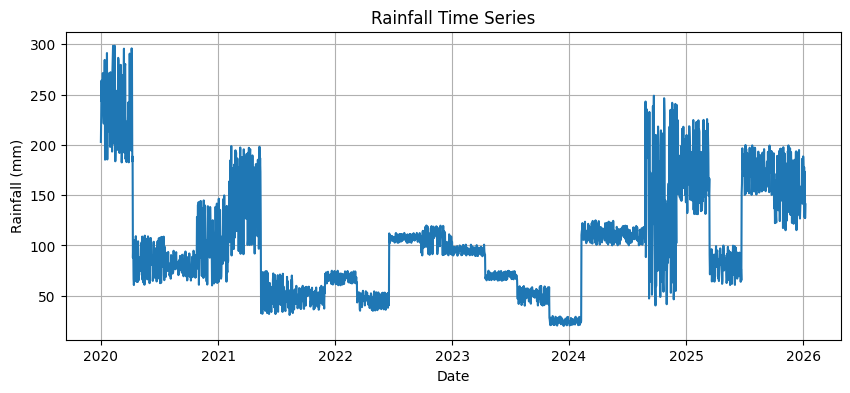

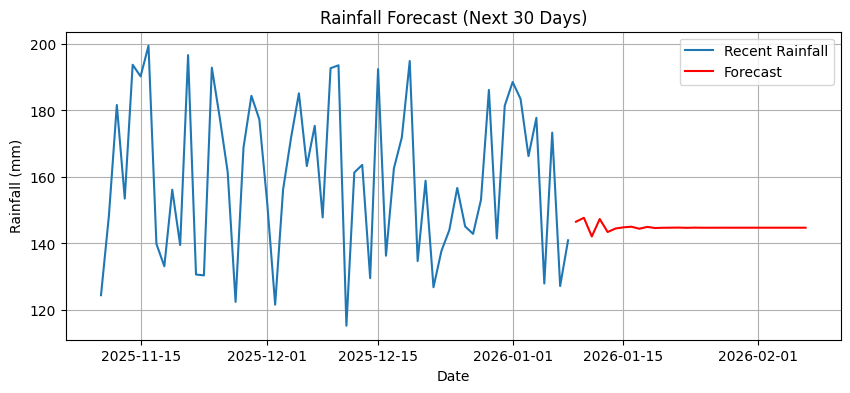

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import ipywidgets as widgets
from IPython.display import display

# File upload widget
uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

def handle_upload(change):
    if uploader.value:
        # Load dataset
        uploaded_file = next(iter(uploader.value.values()))
        df = pd.read_csv(pd.io.common.BytesIO(uploaded_file['content']))

        # Assume daily data
        df.index = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

        # Use rainfall column
        rainfall_series = df['rainfall']

        # Plot time series
        plt.figure(figsize=(10, 4))
        plt.plot(rainfall_series)
        plt.title('Rainfall Time Series')
        plt.xlabel('Date')
        plt.ylabel('Rainfall (mm)')
        plt.grid(True)
        plt.show()

        # ARIMA model
        model = ARIMA(rainfall_series, order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast next 30 days
        forecast = model_fit.forecast(steps=30)
        forecast_index = pd.date_range(start=rainfall_series.index[-1] + pd.Timedelta(days=1), periods=30)

        # Plot forecast
        plt.figure(figsize=(10, 4))
        plt.plot(rainfall_series[-60:], label='Recent Rainfall')
        plt.plot(forecast_index, forecast, color='red', label='Forecast')
        plt.title('Rainfall Forecast (Next 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Rainfall (mm)')
        plt.legend()
        plt.grid(True)
        plt.show()

uploader.observe(handle_upload, names='value')
